## Overview

The data has been split into two groups:


**training set (train.csv)**


**test set (test.csv)**


The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

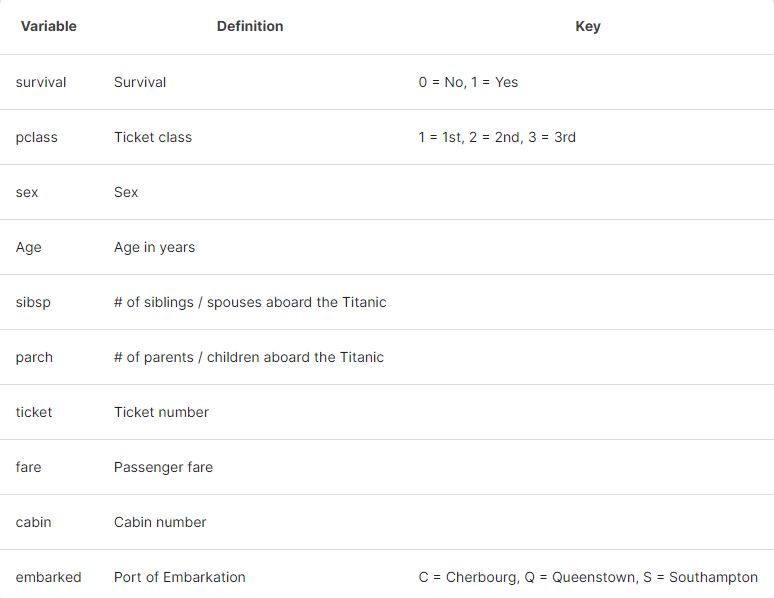

### Importing libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
import pandas as pd

In [152]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [153]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.shape

(891, 12)

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df_train['Embarked'].value_counts().sum()

889

In [18]:
df_train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

**`Conclusion`--**
**1.]** There are total 891 rows and 12 columns in train data set.
**2.]** the mean age of passenger travelling is 29.699.
**2.1].** there are some missing values in age column.
**2.2].** the mini. age of passenger who is travelling is around 4 months and the maximum age of passenger is around 80
**3.]** the mean fare of titanic ship is around--32.24.
**3.1.]** the max amount the passenger had paid for travelling is 512.32
**4.]** there are three port of source consist of 'S' , 'C',& 'Q'
**4.1]** The no of passesnger from each of the source are as follows:
         Embarked    
S      644    
C      16    8
Q           77
NaN     

**5.]** the no of passenger who survived are 342 whereas the no. of passenger who died are are 549 2  

In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

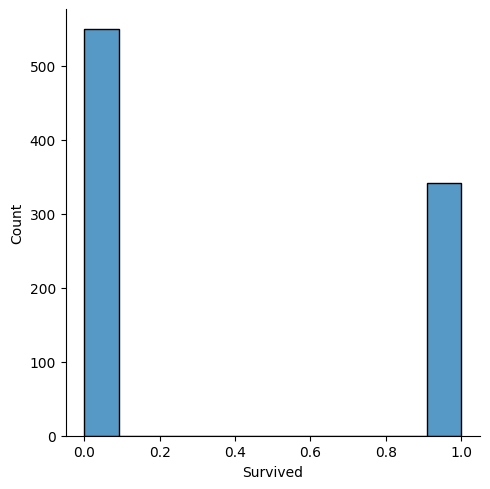

In [25]:
sns.displot(df_train['Survived'])
plt.show()

In [63]:
df_sex=df_train[['Sex','Survived']]
df_sex

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [53]:
df_male=df_sex[df_sex['Sex']=='male']
df_male

,Sex,Survived
0,male,0
4,male,0
5,male,0
6,male,0
7,male,0
...,...,...
883,male,0
884,male,0
886,male,0
889,male,1


In [58]:
df_sur0=df_male[df_male['Survived']==0]

In [59]:
df_sur0.value_counts()

Sex   Survived
male  0           468
Name: count, dtype: int64

In [61]:
df_sur1=df_male[df_male['Survived']==1]
df_sur1.value_counts()

Sex   Survived
male  1           109
Name: count, dtype: int64

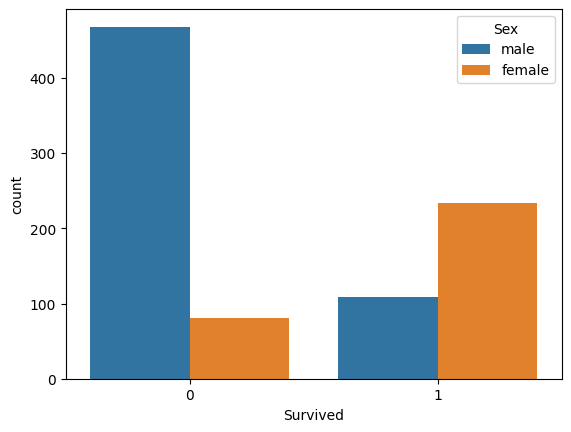

In [67]:
sns.countplot(data=df_train,x='Survived',hue='Sex')
plt.show()

being female,the chances of survival is more than of male.


only 109 male could survive the accident and 468 of them are died.

In [68]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

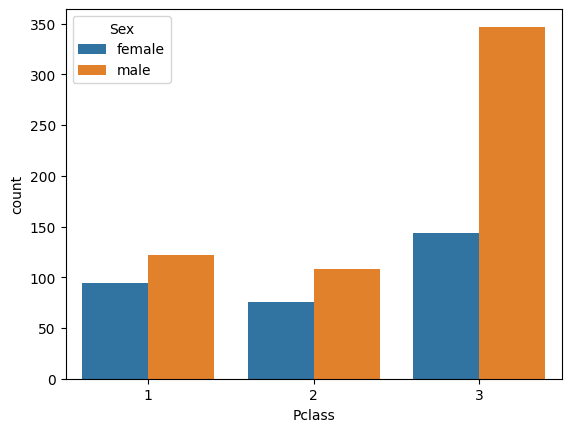

In [84]:
sns.countplot(data=df_train,x='Pclass',hue='Sex')

**The no of passengers in each class are as follow:-**

**Pclass-->>3-491 , 1-216 , 2-184**

**The ratio of male to female in class 3 is much more than of other two classes**

**2 class has the least passenger whereas 3 has the highest**

In [145]:
print(df_train['Fare'].min())
print(df_train['Fare'].max())

0.0
512.3292


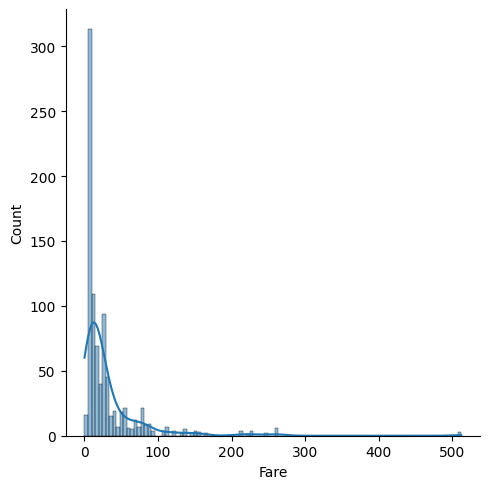

In [91]:
sns.displot(df_train['Fare'],kde=True)

Log transformation is a common technique used to reduce skewness in a distribution and make it more symmetric. Skewness is a measure of the asymmetry of a probability distribution, and a right-skewed distribution has a long tail on the right side of the distribution. Log transformation can help to “stretch out” the tail of a right-skewed distribution, making it more symmetric and easier to analyze.

Additionally, it’s important to keep in mind that the log transformation does not make the data normal, it just remove the skewness. There are other techniques to make data normal such as Box-Cox transformation.

<Axes: xlabel='Fare', ylabel='Count'>

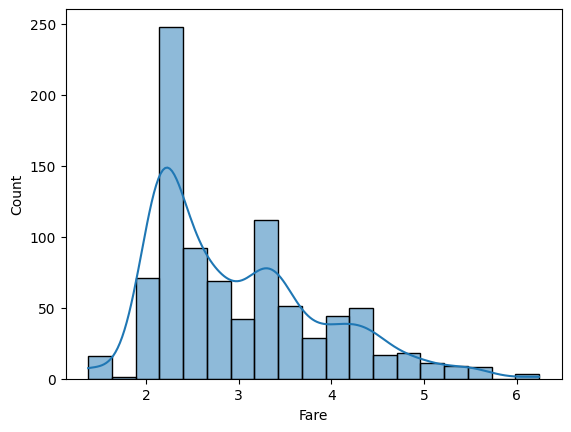

In [161]:
log_data = np.log(df_train['Fare']+1)
sns.histplot(log_data,kde=True)

In [98]:
log_data

0.0

In [99]:
log_data.max()

6.240917354759096

In [129]:
log_data.mean()

2.9622457416890815

In [150]:
n_fare=df_train[df_train['Fare']==0]

df_train['Fare'].

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

In [ ]:
df_train['Fare']=log_data.mean()

In [157]:
df_train['Fare']=df_train['Fare'].replace(0,log_data.mean())
df_train[df_train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [159]:
df_train.loc[413:822,'Fare']

413     2.962246
414     7.925000
415     8.050000
416    32.500000
417    13.000000
         ...    
818     6.450000
819    27.900000
820    93.500000
821     8.662500
822     2.962246
Name: Fare, Length: 410, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

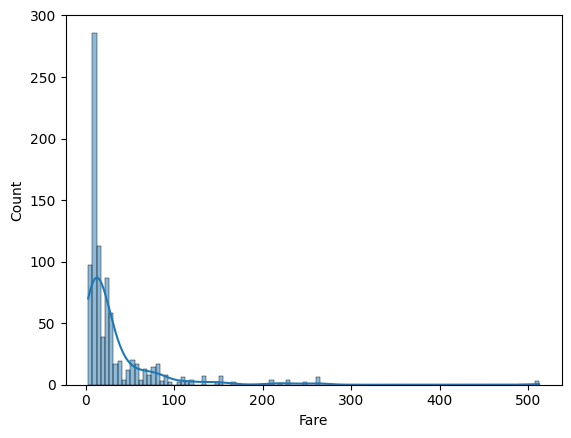

In [160]:
sns.histplot(df_train['Fare'],kde=True)

In [107]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_10972\2134080852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)


In [110]:
df_train['Age'].

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


<Axes: xlabel='Age', ylabel='Count'>

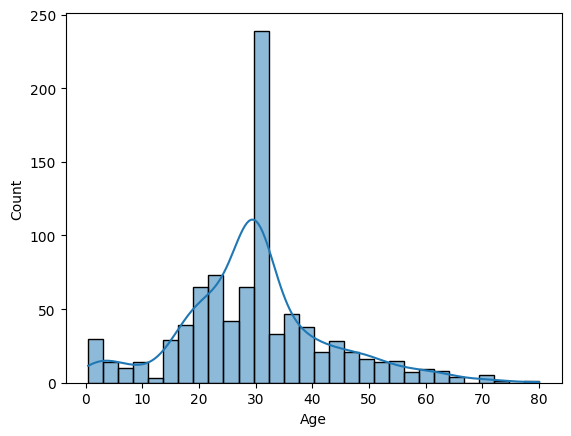

In [111]:
sns.histplot(df_train['Age'],kde=True)

In [127]:
df_train['Fare'].skew()


4.787316519674893

<Axes: >

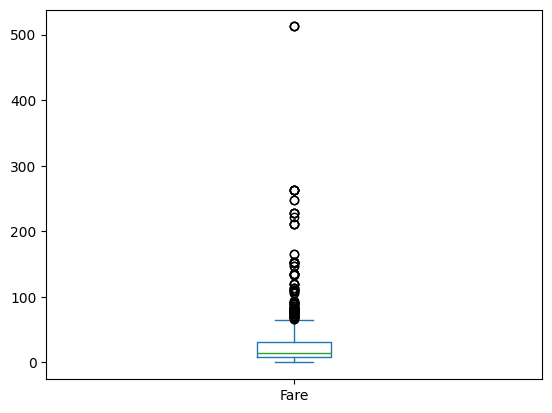

In [128]:
df_train['Fare'].plot(kind='box')

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_10972\3173808241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=True)


<Axes: ylabel='Density'>

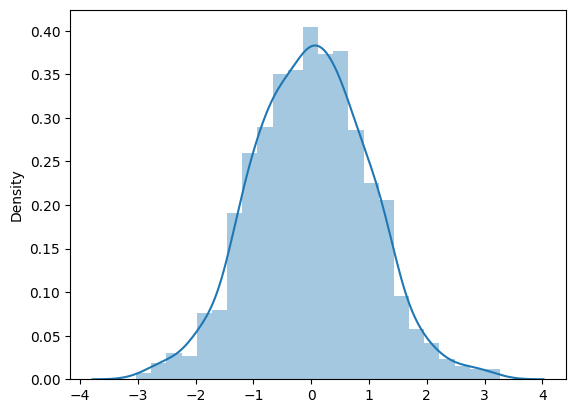

In [118]:
sns.distplot(random.normal(size=1000), hist=True)

In [119]:
from scipy import stats

<Axes: ylabel='Count'>

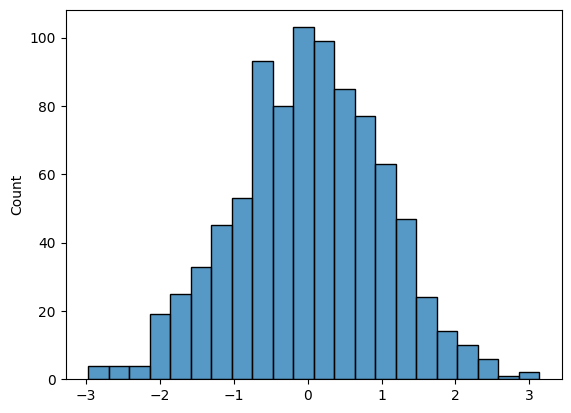

In [179]:
norm=random.normal(size=891).astype('float')
sns.histplot(norm)

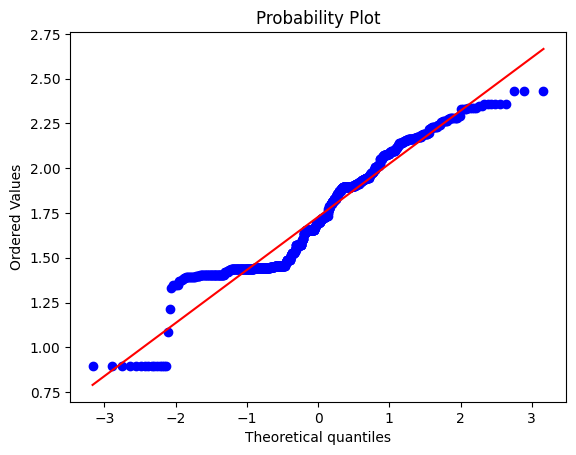

In [184]:
xt=stats.boxcox(df_train['Fare'])
stats.probplot(xt[0],dist='norm',plot=plt)
plt.show()

In [175]:
xt[0].shape

(891,)